In [35]:
import torch
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import torchvision
import datetime
import os
%matplotlib inline

In [36]:
path = '/Users/jokkojja/Desktop/course/pytorch/data'

In [37]:
logdir = os.path.join('logs', datetime.datetime.now().strftime("%Y%m%d - %H%M%S"))
writer = SummaryWriter(logdir)


In [39]:
input_size = 1024
n_class = 10
epochs = 10
step = 1e-2
hidden = 500

batch_size = 100

In [41]:
cifar10_train = torchvision.datasets.CIFAR10(
    path, 
    train=True, 
    transform = torchvision.transforms.ToTensor(),
    download=False)

cifar10_test = torchvision.datasets.CIFAR10(
    path, 
    train=False, 
    transform = torchvision.transforms.ToTensor(),
    download=False)


train_loader = torch.utils.data.DataLoader(dataset = cifar10_train,
                                          batch_size = batch_size,
                                          shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = cifar10_test,
                                          batch_size = batch_size,
                                          shuffle = True)

In [42]:
data_iter = iter(train_loader)
train_x, train_y = data_iter.next()

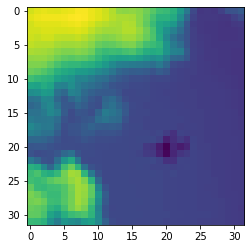

In [43]:
plt.imshow(train_x[0,0])

In [53]:
class CustomClassification(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CustomClassification, self).__init__()
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(hidden_size, num_classes)
        self.soft_max = torch.nn.Softmax()
    
    def forward(self, x):
        out = self.layer1(x)
        oot = self.relu(out)
        out = self.layer2(out)
        return self.soft_max(out)

In [54]:
model = CustomClassification(input_size, hidden, n_class)